In [11]:
import numpy as np
from numpy import genfromtxt
import csv
import os

import matplotlib.pyplot as plt

import pysindy as ps

from scipy import interpolate

In [2]:
DATA_PATH = r"C:\Users\Joost\OneDrive - TU Eindhoven\Documents\Master\thesis\mscth\data"

WIENER = "WienerHammerBenchmark"
SILVER = "SNLS80mV"
OGDATA = "OG-1-1-11"
# change data set
DATA = SILVER
CSV = ".csv"

PATH = os.path.join(DATA_PATH, DATA+CSV)

# load data
data = genfromtxt(PATH, delimiter=",")
data = data[1:,:-1]

V1 = data[:,0]
V2 = data[:,1]

N = V1.shape[0]
fs = 610.35
dt = 1/fs
t = np.linspace(0,dt*N,N)

# silver_data = System_data(u=V1,y=V2)
u = V1
y = V2

In [3]:
# # linear interpolation
# from scipy import interpolate

# y_int_fun = interpolate.interp1d(t, y)
# u_int_fun = interpolate.interp1d(t, u)

In [4]:
# plt.plot(silver_data.y)
# plt.show()

# new_dt = dt/4
# t_new = np.arange(0, t[-1] + new_dt, new_dt)

# plt.plot(y_int_fun(t_new))
# plt.show()

# plt.plot(silver_data.u[:100])
# plt.show()

# new_dt = dt/4
# t_new = np.arange(0, t[-1] + new_dt, new_dt)

# plt.plot(u_int_fun(t_new)[:400])
# plt.show()


In [5]:
# factor = 10

# new_dt = dt/factor
# t_new = np.arange(0, t[-1] + new_dt, new_dt)

# upsample_y = y_int_fun(t_new)
# upsample_u  = u_int_fun(t_new)

# data = np.stack((upsample_u, upsample_y), axis=-1)
# np.savetxt("linear_"+str(factor)+"dt_silver.csv", data, delimiter=",")

In [6]:
## ONLY WORKS WITH SCIPY 1.13

# from scipy import interpolate

# y_akima = interpolate.Akima1DInterpolator(t, y, method="akima")
# u_akima = interpolate.Akima1DInterpolator(t, u, method="akima")

# y_makima = interpolate.Akima1DInterpolator(t, y, method="makima")
# u_makima = interpolate.Akima1DInterpolator(t, u, method="makima")

In [7]:
# factor = 10
# new_dt = dt/factor
# t_new = np.arange(0, t[-1] + new_dt, new_dt)

# y_inter_a = y_akima(t_new)
# y_inter_ma = y_makima(t_new)

# u_inter_a = u_akima(t_new)
# u_inter_ma = u_makima(t_new)

# data = np.stack((u_inter_a, y_inter_a), axis=-1)
# np.savetxt("akima_"+str(factor)+"dt_silver.csv", data, delimiter=",")

# data = np.stack((u_inter_ma, y_inter_ma), axis=-1)
# np.savetxt("makima_"+str(factor)+"dt_silver.csv", data, delimiter=",")

In [13]:
differentiation_method = ps.FiniteDifference(order=4)
dy = differentiation_method(y)
du = differentiation_method(u)

y_cH = interpolate.CubicHermiteSpline(t, y, dy)
u_cH = interpolate.CubicHermiteSpline(t, u, du)

In [21]:
factor = 4
new_dt = dt/factor
t_new = np.arange(0, t[-1] + new_dt, new_dt)

y_inter_cH = y_cH(t_new)

u_inter_cH = u_cH(t_new)

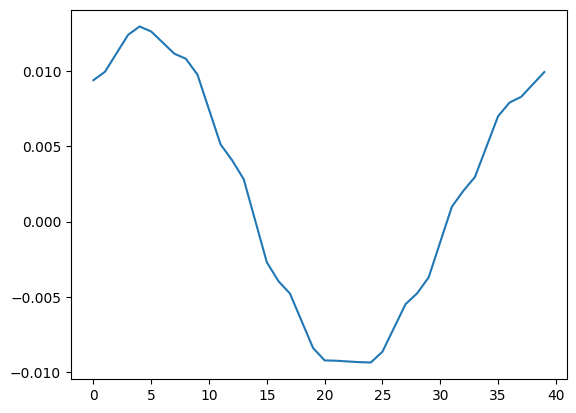

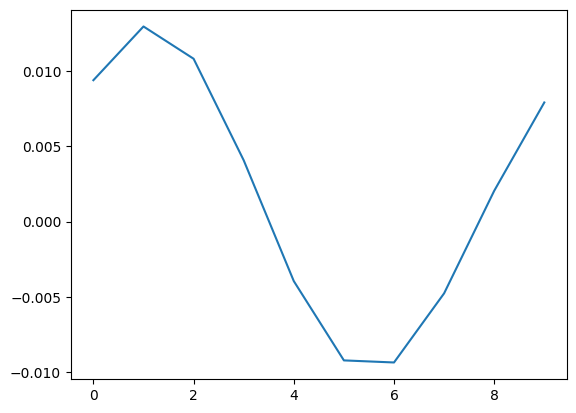

In [24]:
window = 10

plt.plot(y_inter_cH[:window*factor])
plt.show()
plt.plot(y[:window])
plt.show()